In [35]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import torch
from torch_geometric.data import Data

In [17]:
df = pd.read_csv("data/sider.csv")
df.columns
df.head()
df.shape

(1427, 28)

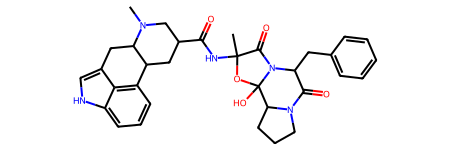

In [15]:
smi = df["smiles"][500]
mol = Chem.MolFromSmiles(smi)
mol

In [22]:
edges = []
for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    edges.extend([(i,j), (j,i)])
edge_index = list(zip(*edges))

In [24]:
# Atomic number and chirality for atoms
# Bond type and bond direction for bonds
def atom_feature(atom):
    return [atom.GetAtomicNum(),
           atom.GetChiralTag()]
def bond_feature(bond):
    return [bond.GetBondType(),
           bond.GetBondDir()]

In [25]:
node_features = [atom_feature(a) for a in mol.GetAtoms()]
edge_features = [bond_feature(b) for b in mol.GetBonds()]

In [36]:
g = Data(edge_index=torch.LongTensor(edge_index),
         x=torch.FloatTensor(node_features),
         edge_attr=torch.FloatTensor(edge_features),
         smiles=smi,
         mol=mol)

In [48]:
g.x

tensor([[6., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [8., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [8., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.]])

In [50]:
g.edge_attr

tensor([[ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.]])